In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import model_selection

# 明白了最小二乘和梯度下降的区别

https://www.zhihu.com/question/20822481
https://blog.csdn.net/sxf1061926959/article/details/66976356

In [29]:
dataset = pd.read_csv('../datasets/50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values
pd.DataFrame(X)

,0,1,2,3
0,165349,136898,471784,New York
1,162598,151378,443899,California
2,153442,101146,407935,Florida
3,144372,118672,383200,New York
4,142107,91391.8,366168,Florida
5,131877,99814.7,362861,New York
6,134615,147199,127717,California
7,130298,145530,323877,Florida
8,120543,148719,311613,New York
9,123335,108679,304982,California


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
pd.DataFrame(X)

,0,1,2,3
0,165349,136898,471784,2
1,162598,151378,443899,0
2,153442,101146,407935,1
3,144372,118672,383200,2
4,142107,91391.8,366168,1
5,131877,99814.7,362861,2
6,134615,147199,127717,0
7,130298,145530,323877,1
8,120543,148719,311613,2
9,123335,108679,304982,0


In [32]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


In [33]:
X = X[: , 1:]
pd.DataFrame(X)

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,1.0,131876.90,99814.71,362861.36
6,0.0,0.0,134615.46,147198.87,127716.82
7,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,1.0,120542.52,148718.95,311613.29
9,0.0,0.0,123334.88,108679.17,304981.62


In [34]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state =0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

/home/huahua/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
Y_P=regressor.predict(X_test)

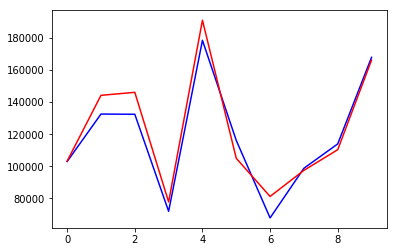

In [40]:
plt.plot(Y_P, color ='blue')
plt.plot(Y_test, color ='red')

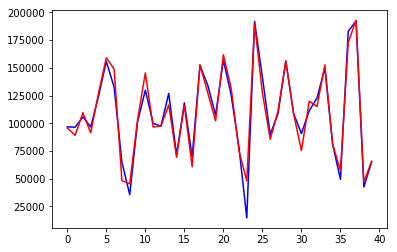

In [41]:
Y_train_p=regressor.predict(X_train)
plt.plot(Y_train, color ='blue')
plt.plot(Y_train_p, color ='red')

In [123]:
def weightUpdate(x,y,w,b,learning_rate):
    for i in range(x.shape[0]):
        y_n=np.dot(x[i],w)+b
        w_g = 2/x.shape[0]*(y_n-y[i])*x[i]
        b_g = 2/x.shape[0]*(y_n-y[i])
#         print(y_n.shape,w_g.shape,b_g.shape,w.shape,b.shape,np.mat(w_g*learning_rate).T.shape)
        w-=np.mat(learning_rate*w_g).T
        b-=learning_rate*b_g
        loss=0.5*np.square(y_n-y[i])
        print("y_n",y_n,"y",y[i],"w",w,"w_g",w_g,"b",b,"b_g",learning_rate*b_g)
    return [w,b,loss]


In [106]:
def LinearRegress(x,y,learning_rate,nums):
    w = np.random.randn(x.shape[1],1)
    print(w)
    b = np.random.randn(1)
    for i in range(nums):
        w,b,loss=weightUpdate(x,y,w,b,learning_rate)
        if(i%100==0):
            print(loss)
    return [w,b]

In [129]:
w,b = LinearRegress(X_train,Y_train,0.000001,10)

[[ 0.47231101]
 [ 0.57213713]
 [ 1.05145427]
 [-1.21320423]
 [-1.23996816]]
y_n [-332820.18554174] y 96778.92 w [[4.93790969e-01]
 [5.72137133e-01]
 [1.19305902e+03]
 [2.21245707e+03]
 [4.60910615e+03]] w_g [-2.14799553e+04 -0.00000000e+00 -1.19200756e+09 -2.21367028e+09
 -4.61034612e+09] b [0.12656936] b_g [-0.02147996]
y_n [1.19031387e+09] y 96479.51 w [[ 4.93790969e-01]
 [-5.89387324e+01]
 [-2.73714128e+06]
 [-5.05903465e+06]
 [-1.22259244e+07]] w_g [0.00000000e+00 5.95108696e+07 2.73833434e+12 5.06124711e+12
 1.22305335e+13] b [-59.38430022] b_g [59.51086958]
y_n [-2.57426069e+12] y 105733.54 w [[ 1.28713534e+05]
 [-5.89387324e+01]
 [ 9.69307072e+09]
 [ 1.85471211e+10]
 [ 1.72417661e+10]] w_g [-1.28713040e+11 -0.00000000e+00 -9.69580786e+15 -1.85521802e+16
 -1.72539920e+16] b [128653.65570443] b_g [-128713.04000464]
y_n [7.00930353e+15] y 96712.8 w [[ 1.28713534e+05]
 [-5.89387324e+01]
 [-1.62610278e+13]
 [-5.52476804e+13]
 [-7.38600009e+13]] w_g [0.00000000e+00 0.00000000e+00 1.62

 [ 7.66180373e+125]] w_g [-0.00000000e+000 -1.99967151e+126 -2.88697395e+131 -2.37304717e+131
 -7.66273362e+131] b [1.99935858e+120] b_g [-1.99967151e+120]
y_n [4.41689065e+131] y 192261.83 w [[-3.13032096e+116]
 [-2.20824536e+124]
 [-3.65135798e+129]
 [-3.02307580e+129]
 [-1.04183277e+130]] w_g [0.00000000e+000 2.20844533e+130 3.65164668e+135 3.02331307e+135
 1.04190939e+136] b [-2.20824539e+124] b_g [2.20844533e+124]
y_n [-4.09405844e+134] y 42559.73 w [[-3.13032096e+116]
 [-2.20824536e+124]
 [-3.65135798e+129]
 [ 2.76920555e+132]
 [-1.04183277e+130]] w_g [-0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -2.77222863e+138
 -0.00000000e+000] b [2.04482098e+127] b_g [-2.04702922e+127]
y_n [4.28313843e+137] y 65200.33 w [[-3.13032096e+116]
 [-2.20824536e+124]
 [-4.74955304e+134]
 [-3.31251143e+135]
 [-6.06818059e+134]] w_g [0.00000000e+000 0.00000000e+000 4.74951652e+140 3.31528064e+141
 6.06807640e+140] b [-2.13952439e+130] b_g [2.14156921e+130]
[9.17263739e+274]
y_n [-4.97980538e+140

/home/huahua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/home/huahua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/home/huahua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/huahua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


 [[ 1.72960694e+275]
 [-7.99688896e+271]
 [ 1.30252534e+280]
 [ 2.49230568e+280]
 [ 2.31689605e+280]] w_g [-1.72960665e+281 -0.00000000e+000 -1.30289315e+286 -2.49298550e+286
 -2.31853893e+286] b [1.72880725e+275] b_g [-1.72960665e+275]
y_n [9.41888873e+285] y 96712.8 w [[ 1.72960694e+275]
 [-7.99688896e+271]
 [-2.18510741e+283]
 [-7.42401513e+283]
 [-9.92508210e+283]] w_g [0.00000000e+000 0.00000000e+000 2.18640994e+289 7.42650743e+289
 9.92739900e+289] b [-4.70771556e+278] b_g [4.70944437e+278]
y_n [-3.97522551e+289] y 124266.9 w [[ 1.98761293e+282]
 [-7.99688896e+271]
 [ 1.82339949e+287]
 [ 2.26863016e+287]
 [ 5.86086648e+287]] w_g [-1.98761275e+288 -0.00000000e+000 -1.82361801e+293 -2.26937256e+293
 -5.86185899e+293] b [1.98714198e+282] b_g [-1.98761275e+282]
y_n [2.4659374e+293] y 155752.6 w [[-1.23276994e+286]
 [-7.99688896e+271]
 [-1.60635282e+291]
 [-1.79411323e+291]
 [-3.99271201e+291]] w_g [1.23296870e+292 0.00000000e+000 1.60653516e+297 1.79434009e+297
 3.99329810e+297] b [-

y_n [nan] y 71498.49 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 118474.03 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 69758.98 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 152211.77 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 134307.35 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 107404.34 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 156991.12 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 125370.37 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 78239.91 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 14681.4 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan 

 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 156122.51 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 108733.99 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 90708.19 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 111313.02 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 122776.86 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 149759.96 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 81005.76 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 49490.75 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 182901.99 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 192

 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 111313.02 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 122776.86 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 149759.96 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 81005.76 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 49490.75 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 182901.99 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 192261.83 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 42559.73 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 65200.33 w [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] w_g [nan nan nan nan nan] b [nan] b_g [nan]
y_n [nan] y 9677

In [125]:
import numpy as np
#learningRate学习率，Loopnum迭代次数
 
def liner_Regression(data_x,data_y,learningRate,Loopnum):
    Weight=np.ones(shape=(1,data_x.shape[1]))
    baise=np.array([[1]])
 
    for num in range(Loopnum):
        WXPlusB = np.dot(data_x, Weight.T) + baise 
 
        loss=np.dot((data_y-WXPlusB).T,data_y-WXPlusB)/data_y.shape[0]
        w_gradient = -(2/data_x.shape[0])*np.dot((data_y-WXPlusB).T,data_x)
        baise_gradient = -2*np.dot((data_y-WXPlusB).T,np.ones(shape=[data_x.shape[0],1]))/data_x.shape[0]
 
        Weight=Weight-learningRate*w_gradient
        baise=baise-learningRate*baise_gradient
        if num%50==0:
            print(loss)       #每迭代50次输出一次loss
    return (Weight,baise)


In [128]:
w,b = liner_Regression(X_train,Y_train,0.000001,100)

[[1.17902518e+11 1.17992467e+11 1.15212385e+11 ... 8.92176878e+10
  1.34190965e+11 1.27389310e+11]
 [1.17992467e+11 1.18082504e+11 1.15299652e+11 ... 8.92790475e+10
  1.34297147e+11 1.27488713e+11]
 [1.15212385e+11 1.15299652e+11 1.12602437e+11 ... 8.73825676e+10
  1.31015319e+11 1.24416403e+11]
 ...
 [8.92176878e+10 8.92790475e+10 8.73825676e+10 ... 6.96498434e+10
  1.00329128e+11 9.56892640e+10]
 [1.34190965e+11 1.34297147e+11 1.31015319e+11 ... 1.00329128e+11
  1.53419132e+11 1.45389922e+11]
 [1.27389310e+11 1.27488713e+11 1.24416403e+11 ... 9.56892640e+10
  1.45389922e+11 1.37873309e+11]]
[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
